In [1]:
import lighthouse as lh

import numpy as np
import matplotlib.pyplot as plt 

import torch 

In [2]:
# lh.isochrone.get_isochrones.get_mist_isochrones()

In [3]:
import read_mist_models

ref_iso_solar = read_mist_models.ISO('/Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')
ref_iso_mp    = read_mist_models.ISO('/Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_basic.iso')

I = lh.isochrone.MIST()


Reading in: /Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso
Reading in: /Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_basic.iso


/var/folders/n8/zpctb3_d3ls5r091rzymq5t00000gn/T/ipykernel_22937/2512880971.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64),
/var/folders/n8/zpctb3_d3ls5r091rzymq5t00000gn/T/ipykernel_22937/2512880971.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64),


tensor(0., dtype=torch.float64) tensor(10., dtype=torch.float64)
tensor(11)
tensor(99)
['log_g', 'Teff', 'initial_mass', 'phase', 'log_l', 'current_mass']
tensor(-0.5000, dtype=torch.float64) tensor(10., dtype=torch.float64)
tensor(9)
tensor(99)
['log_g', 'Teff', 'initial_mass', 'phase', 'log_l', 'current_mass']


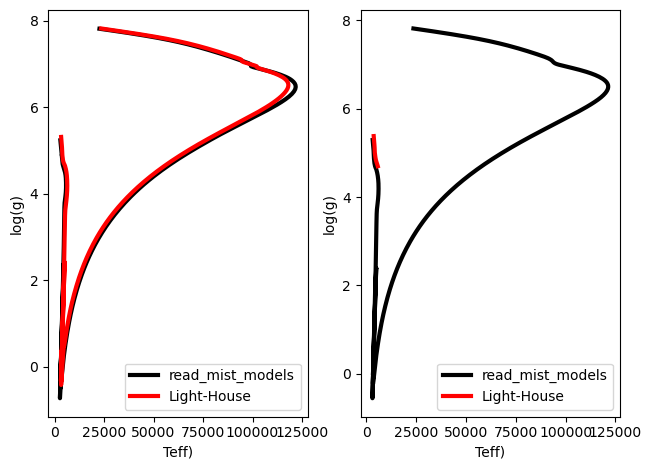

In [4]:


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


age_ind = ref_iso_solar.age_index(10.) #returns the index for the desired age
Teff = 10**ref_iso_solar.isos[age_ind]['log_Teff']
log_g = ref_iso_solar.isos[age_ind]['log_g']
ax1.plot(Teff, log_g, color='k', lw=3, label='read_mist_models') 

mask = ((I.metallicities == 0.0))
for metallicity in I.metallicities[mask]:
    iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
                          torch.tensor(10.,dtype = torch.float64))  
    ax1.plot(iso["Teff"], iso["log_g"], label='Light-House', color='r', lw=3)

ax1.legend()
ax1.set_xlabel('Teff)')
ax1.set_ylabel('log(g)')



age_ind = ref_iso_mp.age_index(10.) #returns the index for the desired age
Teff = 10**ref_iso_mp.isos[age_ind]['log_Teff']
log_g = ref_iso_mp.isos[age_ind]['log_g']
ax2.plot(Teff, log_g, color='k', lw=3, label='read_mist_models') 

mask = ((I.metallicities == -0.5))
for metallicity in I.metallicities[mask]:
    iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
                          torch.tensor(10.,dtype = torch.float64))  
    ax2.plot(iso["Teff"], iso["log_g"], label='Light-House', color='r', lw=3)

ax2.legend()
ax2.set_xlabel('Teff)')
ax2.set_ylabel('log(g)')

plt.tight_layout()

In [5]:
# I = lh.isochrone.MIST()

# mask = ((I.metallicities == 0.0) | (I.metallicities == -0.5))


# for metallicity in I.metallicities[mask]:
#     iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
#                           torch.tensor(10.,dtype = torch.float64))

#     print(metallicity, len(iso["log_g"]))
#     print('\n')

#     plt.scatter(iso["Teff"], iso["log_g"], label=metallicity)


# plt.legend()
